In [ ]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Guiding Question 1
## What trends related to temperature do you notice across the years?

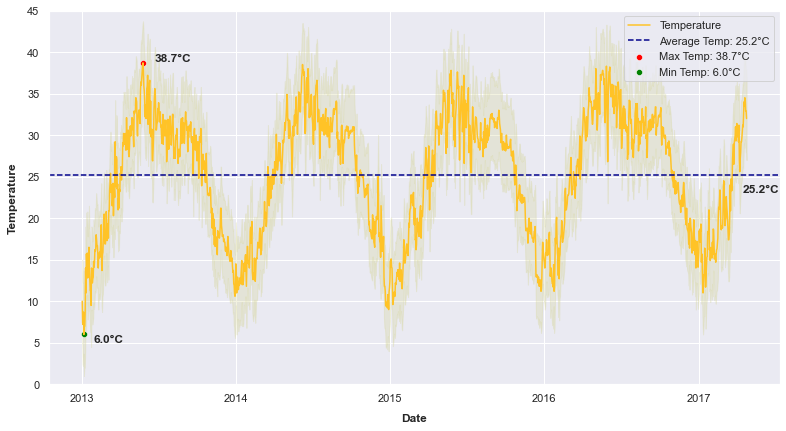

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read CSV file
data = pd.read_csv('climate.csv')

# Parse a date column into a date format
data['date'] = pd.to_datetime(data['date'])

# Get data for time and temperature columns
time = data['date']
temperature = data['meantemp']

# Calculate maximum, minimum, and average temperatures
max_temp = max(temperature)
min_temp = min(temperature)
avg_temp = sum(temperature) / len(temperature)

# Set chart size
plt.figure(figsize=(11, 6))

# Create a line chart using Seaborn
sns.lineplot(x=time, y=temperature, color = "#ffc327", label='Temperature')

# Set y-axis limits
plt.ylim(0, 45)

# Add shadows for trend bands using Matplotlib
plt.fill_between(time, temperature - 5, temperature + 5, color='#d6d699', alpha=0.3)

# Add average temperature line
plt.axhline(avg_temp, color='darkblue', linestyle='--', label=f'Average Temp: {avg_temp:.1f}°C')

# Convert max_temp_date and min_temp_date to lists
max_temp_dates = [time[temperature.idxmax()]]
min_temp_dates = [time[temperature.idxmin()]]

# Mark the highest and lowest points using Seaborn
sns.scatterplot(x=max_temp_dates, y=[max_temp], color='red', label=f'Max Temp: {max_temp}°C')
sns.scatterplot(x=min_temp_dates, y=[min_temp], color='green', label=f'Min Temp: {min_temp}°C')

# Add the highest temperature value label and offset it to the right by 35 units
plt.annotate(f'{max_temp}°C', xy=(max_temp_dates[0], max_temp), xytext=(30, 0), textcoords='offset points',
             ha='center', fontsize=12, fontweight='bold', va='bottom')

# Add the lowest temperature label and offset it 30 units to the right
plt.annotate(f'{min_temp}°C', xy=(min_temp_dates[0], min_temp), xytext=(25, 0), textcoords='offset points',
             ha='center', fontsize=12, fontweight='bold', va='top')

# Add the average temperature label, offset 5 units to the right, and move down 10 units
plt.annotate(f'{avg_temp:.1f}°C', xy=(time.iloc[-1], avg_temp), xytext=(-4, -10), textcoords='offset points',
             ha='left', fontsize=12, fontweight='bold', va='top')

# Set the x-axis interval and format to year and quarter
years = mdates.YearLocator()
quarters = mdates.MonthLocator(bymonth=[1, 4, 7, 10], bymonthday=3)
years_fmt = mdates.DateFormatter('%Y')

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(quarters)
ax.xaxis.set_major_formatter(years_fmt)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')

# Adjust chart size and layout
sns.set_style("whitegrid")
sns.set_context("paper")
plt.tight_layout()

plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Temperature', fontsize=12, fontweight='bold', labelpad=10)

plt.savefig('temperature_seaborn.jpg', dpi=300)
plt.show()


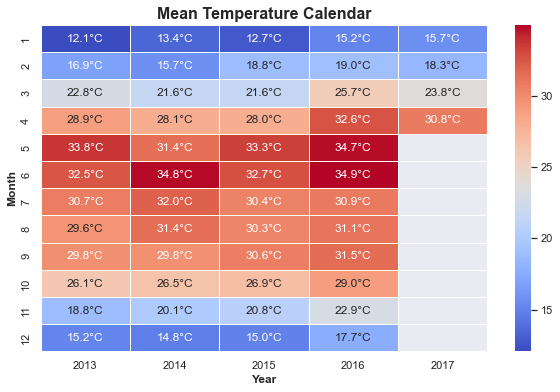

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
data = pd.read_csv('climate.csv')

# Extract month and year
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Extract month and year
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Convert data to a string with unit symbols
data['meantemp_str'] = data['meantemp'].apply(lambda x: f"{x:.1f}°C")

# Calculate the data for the heatmap
heatmap_data = data.pivot_table(index='month', columns='year', values='meantemp')

# Compute annotation data and convert to string with unit notation
annot_data = data.pivot_table(index='month', columns='year', values='meantemp', aggfunc=lambda x: f"{x.mean():.1f}°C")

# Draw Grid Axis Calendar
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=annot_data, fmt='', linewidths=0.5, ax=ax)

# Set graphics properties
ax.set_title('Mean Temperature Calendar', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Month', fontsize=12, fontweight='bold')

plt.savefig('HEATMAP CALENDAR_temperature_seaborn.jpg', dpi=300)

plt.show()


# Guiding Question 2
## What trends related to humidity do you notice across the years?

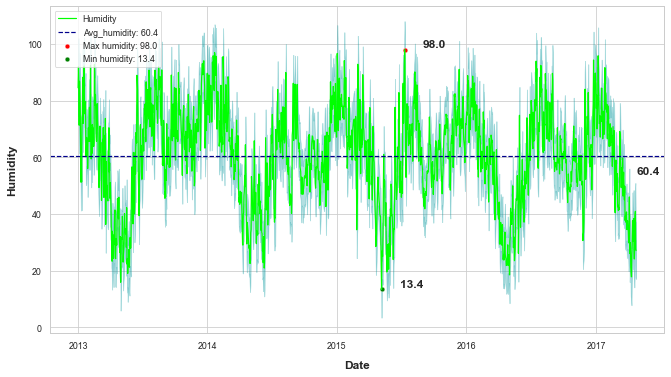

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file
data = pd.read_csv('climate.csv')

# Parse date column as date format
data['date'] = pd.to_datetime(data['date'])

# Get data for time and humidity columns
time = data['date']
humidity = data['humidity']

# Calculation of maximum humidity, minimum humidity and average humidity
max_humidity = max(humidity)
min_humidity = min(humidity)
avg_humidity = sum(humidity) / len(humidity)

# Set chart size
plt.figure(figsize=(11, 6))

# Create a line graph
sns.lineplot(x=time, y=humidity, color='#00ff00', label='Humidity')

# Calculate the upper and lower bounds of the trend band
trend_upper = humidity + 10
trend_lower = humidity - 10

# Adding shading to trend bands using Matplotlib
plt.fill_between(time, trend_lower, trend_upper, color='#03989e', alpha=0.3)

# Add Average Humidity Line
plt.axhline(avg_humidity, color='darkblue', linestyle='--', label=f'Avg_humidity: {avg_humidity:.1f}')

# Mark the highest and lowest points
max_humidity_date = time[humidity.idxmax()]
min_humidity_date = time[humidity.idxmin()]
sns.scatterplot(x=[max_humidity_date], y=[humidity.loc[humidity.idxmax()]], color='red', label=f'Max humidity: {max_humidity}')
sns.scatterplot(x=[min_humidity_date], y=[humidity.loc[humidity.idxmin()]], color='green', label=f'Min humidity: {min_humidity}')

# Add labels for highest and lowest humidity values
plt.annotate(f'{max_humidity}', xy=(max_humidity_date, humidity.loc[humidity.idxmax()]), xytext=(30, 0), textcoords='offset points',
             ha='center', fontsize=12, fontweight='bold', va='bottom')

plt.annotate(f'{min_humidity}', xy=(min_humidity_date, humidity.loc[humidity.idxmin()]), xytext=(30, 0), textcoords='offset points',
             ha='center', fontsize=12, fontweight='bold', va='bottom')

# Adds a label for the average humidity value and offsets it 5 units to the right and 10 units down
plt.annotate(f'{avg_humidity:.1f}', xy=(time.iloc[-1], avg_humidity), xytext=(0, -10), textcoords='offset points',
             ha='left', fontsize=12, fontweight='bold', va='top')

# Set x-axis and y-axis labels
plt.xlabel('Date', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.ylabel('Humidity', fontsize = 12, fontweight = 'bold', labelpad = 10)



# Show a legend with an extra label and place it in the upper left corner
plt.legend(loc='upper left')


#plt.title('Humidity Trend over the Years', fontsize = 15, fontweight = 'bold')

# Set the x-axis scale format to year
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))


plt.savefig('humidity_seaborn.jpg', dpi=300)

plt.show()


# Guiding Question 3
## How does temperature affect humidity, wind speed and pressure?

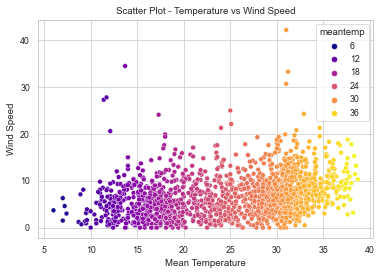

In [ ]:

# Read the CSV file
data = pd.read_csv('climate.csv')


# Create a scatter plot using Seaborn and specify the hue
sns.scatterplot(x='meantemp', y='wind_speed', hue='meantemp', palette='plasma', data=data)

# Set the labels and title
plt.xlabel('Mean Temperature')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot - Temperature vs Wind Speed')
plt.savefig('temp_windspeed.jpg', dpi=300)
plt.show()

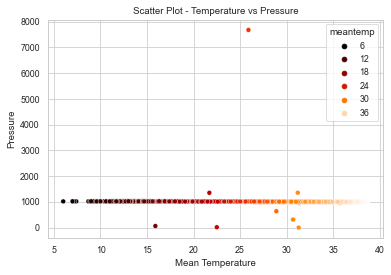

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
data = pd.read_csv('climate.csv')

# Create a scatter plot using Seaborn and specify the hue and palette
sns.scatterplot(x='meantemp', y='meanpressure', hue='meantemp', palette='gist_heat', data=data)

# Set the labels and title
plt.xlabel('Mean Temperature')
plt.ylabel('Pressure')
plt.title('Scatter Plot - Temperature vs Pressure')
plt.savefig('temp_pressure.jpg', dpi=300)
plt.show()


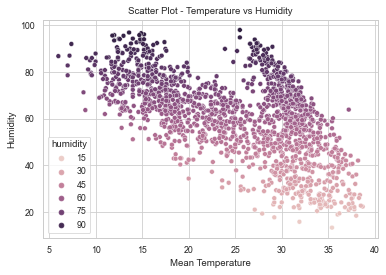

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
data = pd.read_csv('climate.csv')

# Create a scatter plot using Seaborn and specify the hue and color map
sns.scatterplot(x='meantemp', y='humidity', hue='humidity', cmap='viridis', data=data)

# Set the labels and title
plt.xlabel('Mean Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot - Temperature vs Humidity')

plt.show()


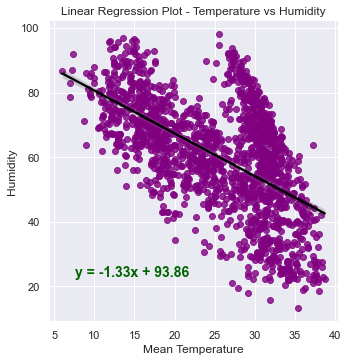

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV file
data = pd.read_csv('climate.csv')

# Create a linear regression plot with customized colors
sns.lmplot(x='meantemp', y='humidity', data=data, scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})

# Calculate the regression line equation
slope, intercept, r_value, p_value, std_err = linregress(data['meantemp'], data['humidity'])
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Add the equation to the plot
plt.text(0.09, 0.15, equation, transform=plt.gca().transAxes, fontsize=14, fontweight='bold', color='darkgreen')

# Set the labels and title
plt.xlabel('Mean Temperature')
plt.ylabel('Humidity')
plt.title('Linear Regression Plot - Temperature vs Humidity')

plt.savefig('Linear Regression_temp.jpg', dpi=300)

# Display the plot
plt.show()


# Correlation matrix plot

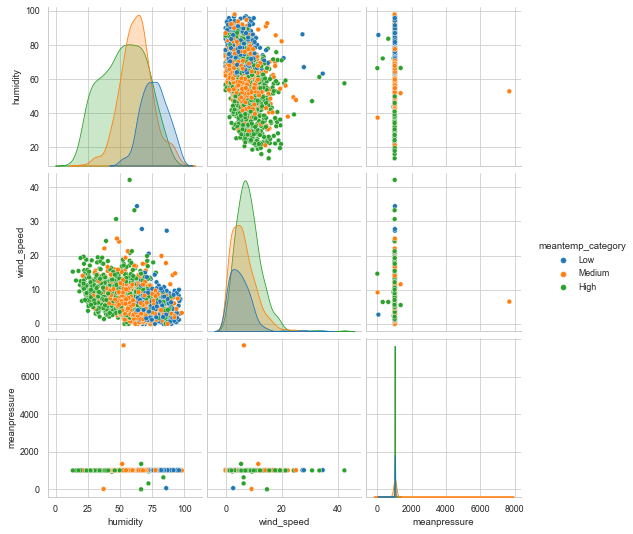

In [ ]:
# Create discrete "meantemp" categories
data["meantemp_category"] = pd.cut(data["meantemp"], bins=3, labels=["Low", "Medium", "High"])

# Draw a color-coded correlation matrix plot
sns.pairplot(data=data, vars=["humidity", "wind_speed", "meanpressure"], hue="meantemp_category")

plt.savefig('CORELATION_TEMP.jpg', dpi=300)

# Guiding Question 4
## How does the frequency of traffic incidents change based on the time of day?

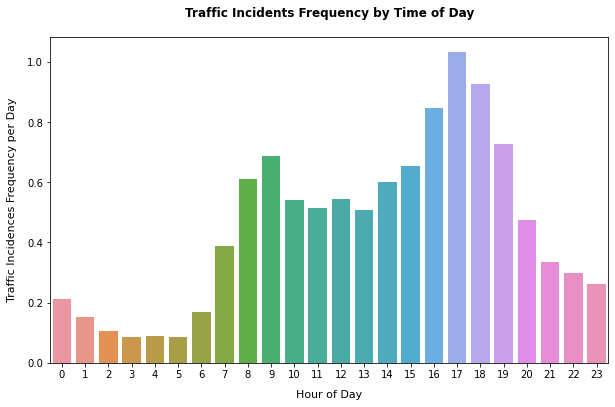

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TrafficIncidents.csv')

# Convert data types of time and date columns
df['time'] = pd.to_datetime(df['time'])
df['date'] = pd.to_datetime(df['date'])


total_days = (df['date'].max() - df['date'].min()).days + 1

# Extract hour information as a new column
df['hour'] = df['time'].dt.hour

# Calculate the frequency of traffic accidents per hour
hourly_frequency = df.groupby('hour').size() / total_days

# Set chart size
plt.figure(figsize=(10, 6))

# Draw a bar graph
sns.barplot(x=hourly_frequency.index, y=hourly_frequency.values)

# Set the font size and boldness of the axis labels, and adjust the position
plt.xlabel('Hour of Day', fontsize=11, labelpad=10)
plt.ylabel('Traffic Incidences Frequency per Day', fontsize=11, labelpad=10)

# Set the font size and boldness of the axis tick labels
# plt.xticks(fontsize=10, fontweight='bold')
# plt.yticks(fontsize=10, fontweight='bold')

# Set the font size and boldness of the figure title, and adjust the position
plt.title('Traffic Incidents Frequency by Time of Day', fontsize=12, fontweight='bold', pad=20)

# Adjust the axis text position
# plt.subplots_adjust(bottom=0, left=0.25)

plt.savefig('Traffic Frequency.jpg', dpi=300)

plt.show()


# Guiding Question 5
## Which City Quadrant is more dangerous than others to travel to?

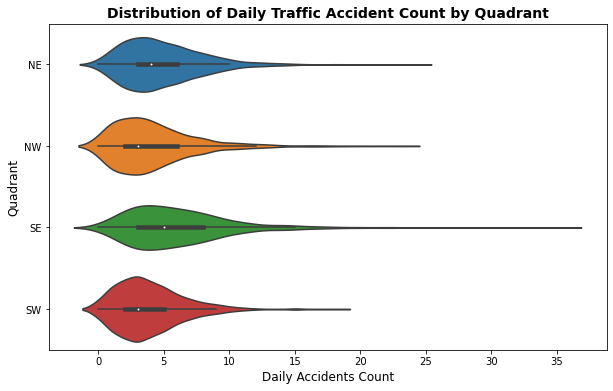

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('TrafficIncidents.csv')

# Convert 'QUADRANT' column to categorical type
df['QUADRANT'] = df['QUADRANT'].astype('category')

# Calculate the daily count of traffic accidents by quadrant
daily_count = df.groupby(['date', 'QUADRANT']).size().reset_index(name='COUNT')

# Create a violin plot with swapped x and y axes
plt.figure(figsize=(10, 6))
sns.violinplot(x='COUNT', y='QUADRANT',  data=daily_count)
plt.xlabel('Daily Accidents Count', fontsize = 12)
plt.ylabel('Quadrant', fontsize = 12)
plt.title('Distribution of Daily Traffic Accident Count by Quadrant', fontsize = 14, fontweight = 'bold')

plt.savefig('Traffic violin.jpg', dpi=300)

plt.show()
